In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
import statsmodels.api as sm
from statsmodels.api import OLS

import tensorflow as tf

In [2]:
# load data 

# House election Harvard Dataverse https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2
district_results = pd.read_csv('1976-2018-house.csv', header=0,encoding = 'unicode_escape')
district_results['candidatevotes'] = district_results['candidatevotes'].str.replace(',', '')
district_results['candidatevotes'] = district_results['candidatevotes'].astype(int)

# 2016 Election Results https://transition.fec.gov/general/FederalElections2016.shtml
pres_gen_results_2016 = pd.read_csv('2016 Pres General Results-Table 1.csv', header=0,encoding = 'unicode_escape')
sen_results_2016 = pd.read_csv('2016 US Senate Results by State-Table 1.csv', header=0,encoding = 'unicode_escape')
house_results_2016 = pd.read_csv('2016 US House Results by State-Table 1.csv', header=0,encoding = 'unicode_escape')

#12/14 State Results
Election_2012 = district_results.loc[district_results['year'] == 2012]
Election_2014 = district_results.loc[district_results['year'] == 2014]
# 16/18 State Results 
Election_2016 = district_results.loc[district_results['year'] == 2016]
Election_2018 = district_results.loc[district_results['year'] == 2018]

# Sports Data 
sports_results = pd.read_csv('sports_data.csv')

states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE','DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [3]:
import glob

# Load Census District Data

filenames = glob.glob('District Data' + "/*.csv")


dfs = {}

filenames.sort()
i = 0 
for filename in filenames:
    dfs['state' + str(i)] = pd.read_csv(filename)
    i = i + 1
    

In [4]:
##### 2014 Set  (includes 2012,2014)
#Get winners for each district 
district_winners_2012 = pd.DataFrame()
for state in states : 
    temp = Election_2012.loc[Election_2012['state_po'] == state]
    #number of districts
    districts_number = temp['district'].max()
    while districts_number >= 0 : 
        district = temp.loc[temp['district'] == districts_number]
        winner = pd.DataFrame(district.loc[district['candidatevotes'] == district['candidatevotes'].max()])
        district_winners_2012 = district_winners_2012.append(winner)
        districts_number = districts_number - 1

#will be the 'result'
district_winners_2014 = pd.DataFrame()
for state in states : 
    temp = Election_2014.loc[Election_2014['state_po'] == state]
    #number of districts
    districts_number = temp['district'].max()
    while districts_number >= 0 : 
        district = temp.loc[temp['district'] == districts_number]
        winner = pd.DataFrame(district.loc[district['candidatevotes'] == district['candidatevotes'].max()])
        district_winners_2014 = district_winners_2014.append(winner)
        districts_number = districts_number - 1


###### 2018 Set (includes 2016,2018)
district_winners_2016 = pd.DataFrame()
for state in states : 
    temp = Election_2016.loc[Election_2016['state_po'] == state]
    #number of districts
    districts_number = temp['district'].max()
    while districts_number >= 0 : 
        district = temp.loc[temp['district'] == districts_number]
        winner = pd.DataFrame(district.loc[district['candidatevotes'] == district['candidatevotes'].max()])
        district_winners_2016 = district_winners_2016.append(winner)
        districts_number = districts_number - 1

district_winners_2018 = pd.DataFrame()
for state in states : 
    temp = Election_2018.loc[Election_2018['state_po'] == state]
    #number of districts
    districts_number = temp['district'].max()
    while districts_number >= 0 : 
        district = temp.loc[temp['district'] == districts_number]
        winner = pd.DataFrame(district.loc[district['candidatevotes'] == district['candidatevotes'].max()])
        district_winners_2018 = district_winners_2018.append(winner)
        districts_number = districts_number - 1

In [5]:
len(district_winners_2018.state_po.value_counts())

50

In [6]:
# Classify based on party 

for district in district_winners_2012.iterrows():
    # May be able to use the vote count to assign the correct value back to the original dataframe, 
    # only two winners shared an exact vote count so only 1 collision must be handled
    if district[1]['party'] == 'republican' : 
        district_winners_2012.loc[district[0],'class'] = 0
    elif district[1]['party'] == 'democrat' :
        district_winners_2012.loc[district[0],'class'] = 1
    else:
        district_winners_2012.loc[district[0],'class'] = 2
        
for district in district_winners_2014.iterrows():
    # May be able to use the vote count to assign the correct value back to the original dataframe, 
    # only two winners shared an exact vote count so only 1 collision must be handled
    if district[1]['party'] == 'republican' : 
        district_winners_2014.loc[district[0],'class'] = 0
    elif district[1]['party'] == 'democrat' :
        district_winners_2014.loc[district[0],'class'] = 1
    else:
        district_winners_2014.loc[district[0],'class'] = 2

    
for district in district_winners_2016.iterrows():
    # May be able to use the vote count to assign the correct value back to the original dataframe, 
    # only two winners shared an exact vote count so only 1 collision must be handled
    if district[1]['party'] == 'republican' : 
        district_winners_2016.loc[district[0],'class'] = 0
    elif district[1]['party'] == 'democrat' :
        district_winners_2016.loc[district[0],'class'] = 1
    else:
        district_winners_2016.loc[district[0],'class'] = 2

for district in district_winners_2018.iterrows():
    # May be able to use the vote count to assign the correct value back to the original dataframe, 
    # only two winners shared an exact vote count so only 1 collision must be handled
    if district[1]['party'] == 'republican' : 
        district_winners_2018.loc[district[0],'class'] = 0
    elif district[1]['party'] == 'democrat' :
        district_winners_2018.loc[district[0],'class'] = 1
    else:
        district_winners_2018.loc[district[0],'class'] = 2


In [7]:
# Mean statistic across all districts for each state  

percentage_below_poverty_line = []
percent_bachelor = []
percent_hs = []
for state in dfs:
    num_cols = len(dfs[state].columns)
    stats_pl = dfs[state][dfs[state]['Subject'] == 'Percentage of Families and People Whose Income in the Past 12 Months is Below the Poverty Level'].iloc[0:1,]
    stats_ba = dfs[state][dfs[state]['Title'] == "Percent bachelor's degree or higher"]
    stats_hs = dfs[state][dfs[state]['Title'] == "Percent high school graduate or higher"]
    pl_mean_sum = 0
    hs_mean_sum = 0
    ba_mean_sum = 0
    for col in range(num_cols):
        if col < 3:
            continue
        elif (col % 2) != 0:
            pl_mean_sum += float(stats_pl.iloc[:,col].values[0])
            hs_mean_sum += float(stats_hs.iloc[:,col].values[0])
            ba_mean_sum += float(stats_ba.iloc[:,col].values[0])
        else:
            continue
            
    pl_mean = pl_mean_sum / ((num_cols - 3)/2)
    percentage_below_poverty_line.append(pl_mean)
    
    hs_mean = hs_mean_sum / ((num_cols - 3)/2)
    
    ba_mean = ba_mean_sum / ((num_cols - 3)/2)
    
    percent_hs.append(hs_mean)
    percent_bachelor.append(ba_mean)
    
    

In [8]:
# Add average district data to sports dataframe 
sports_results['poverty18'] = pd.Series(percentage_below_poverty_line)/100
sports_results['bachelors18'] = pd.Series(percent_bachelor)/100
sports_results['hs18'] = pd.Series(percent_hs)/100

In [9]:
# District Data for 2014

#education data
district_educ = pd.read_csv('district14/Education Attainment edited.csv', header=0,encoding = 'unicode_escape')
bach = district_educ["Total; Estimate; Percent bachelor's degree or higher"]
hs = district_educ["Total; Estimate; Percent high school graduate or higher"]
state_names = district_educ['Geography']

# poverty data
district_pov = pd.read_csv('district14/District Poverty.csv')
poverty = district_pov['Percent below poverty level; Estimate; Population for whom poverty status is determined']

dist14 = pd.DataFrame(state_names)
dist14.insert(1, "hs14", hs/100)
dist14.insert(2, "bachelors14", bach/100)
dist14.insert(3, "poverty14", poverty/100)
dist14 = dist14[:51]
dist14.insert(4, 'state', states)

In [10]:
sports_results = sports_results.join(dist14.set_index('state'), on='State').drop('Geography', axis=1)


In [11]:

#Real GDP per capita by state by year (2018 set)
rGDP_pc_2015 = pd.read_csv('Real_GDP_pc/2015_rGDP_edit.csv')
rGDP_pc_2016 = pd.read_csv('Real_GDP_pc/2016_rGDP_edit.csv')
rGDP_pc_2017 = pd.read_csv('Real_GDP_pc/2017_rGDP_edit.csv')

#Real GDP per capita by state by year (2014 set)
rGDP_pc_2011 = pd.read_csv('Real_GDP_pc/2011_rGDP_edit.csv')
rGDP_pc_2012 = pd.read_csv('Real_GDP_pc/2012_rGDP_edit.csv')
rGDP_pc_2013 = pd.read_csv('Real_GDP_pc/2013_rGDP_edit.csv')


#Unemployment delta by state, 2016--2018
## US national delta = -1%
unemp_delta_df = pd.read_csv('2014_2018_unemp_oneyr_delta.csv')
rGDP_pc_2015.columns = ['state','2015_GDP']
economic_indicators = rGDP_pc_2015.copy()
economic_indicators['2016_GDP'] = rGDP_pc_2016['value']
economic_indicators['2017_GDP'] = rGDP_pc_2017['value']
economic_indicators['2011_GDP'] = rGDP_pc_2011['value']
economic_indicators['2012_GDP'] = rGDP_pc_2012['value']
economic_indicators['2013_GDP'] = rGDP_pc_2013['value']

economic_indicators['state'] = states
# economic_indicators = economic_indicators.join(unemp_delta_df, on = 'state')
economic_indicators = economic_indicators.join(unemp_delta_df.set_index('state'), on='state', how='inner')


economic_indicators['GDP_growth_2017'] = (economic_indicators['2017_GDP']-economic_indicators['2016_GDP'])/ economic_indicators['2017_GDP']
economic_indicators['GDP_growth_2013'] = (economic_indicators['2013_GDP']-economic_indicators['2012_GDP'])/ economic_indicators['2013_GDP']


In [12]:
economic_indicators18 = economic_indicators[['state', '2015_GDP', '2016_GDP', '2017_GDP','2018_oneyr_unemp_delta', 'GDP_growth_2017']]
economic_indicators14 = economic_indicators[['state', '2011_GDP', '2012_GDP', '2013_GDP','2014_oneyr_unemp_delta', 'GDP_growth_2013']]
sports_results18 = sports_results[['State','cfb 18', 'nfl 18', 'nba 18', 'cbb 18', 'poverty18', 'bachelors18', 'hs18']]
sports_results14 = sports_results[['State','cfb 14', 'nfl 14', 'nba 14', 'cbb 14', 'poverty14', 'bachelors14', 'hs14']]


In [13]:
# Classify based on presidential election results 

pres_by_state = pres_gen_results_2016[pres_gen_results_2016['WINNER INDICATOR']=='W']
for state in pres_by_state.iterrows():
    if state[1]['LAST NAME'] == 'Trump' : 
        pres_by_state.loc[state[0],'pres_class'] = 0.0
    else:
        pres_by_state.loc[state[0],'pres_class'] = 1.0
pres_by_state = pres_by_state[['STATE ABBREVIATION', 'pres_class']]

pres_by_state['State'] = pres_by_state['STATE ABBREVIATION']
pres_by_state = pres_by_state.drop('STATE ABBREVIATION', axis=1)
# pres_class tells us which party won that state in the 2016 presidential election

/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
# Combine sports, incumbency, presidential results, economic data dataframes 
def same(row):
    if row.pres == row.incumbency:
        return 1
    else:
        return 0
    
def incwin(row):
    if row['class'] == row.incumbency:
        return 1
    else:
        return 0
# Combine remaining incumbency data ***
    
    
district_winners_2018['incumbency'] = list(district_winners_2016['class'])
model_frame18 = district_winners_2018[['state_po','state_fips','district','incumbency','class']]
model_frame18 = model_frame18.join(sports_results18.set_index('State'), on='state_po', how='inner')
model_frame18 = model_frame18.join(pres_by_state.set_index('State'), on='state_po', how='inner')
model_frame18 = model_frame18.drop('state_fips', axis=1)
model_frame18['state_district'] = model_frame18.apply(lambda row: row.state_po + str(row.district), axis=1)
#model_frame = model_frame.drop(['average','district'], axis=1)
model_frame18 = model_frame18.join(economic_indicators18.set_index('state'), on='state_po', how='inner')
#model_frame18['state_code'] = pd.Categorical(model_frame18.state_po).codes
model_frame18['pres'] = 0
model_frame18['same'] = model_frame18.apply(lambda row: same(row), axis=1)
model_frame18['inc_win'] = model_frame18.apply(lambda row: incwin(row), axis=1)

In [15]:
    
district_winners_2014['incumbency'] = list(district_winners_2012['class'])
model_frame14 = district_winners_2014[['state_po','state_fips','district','incumbency','class']]
model_frame14 = model_frame14.join(sports_results14.set_index('State'), on='state_po', how='inner')
model_frame14 = model_frame14.join(pres_by_state.set_index('State'), on='state_po', how='inner')
model_frame14 = model_frame14.drop('state_fips', axis=1)
model_frame14['state_district'] = model_frame14.apply(lambda row: row.state_po + str(row.district), axis=1)
#model_frame = model_frame.drop(['average','district'], axis=1)
model_frame14 = model_frame14.join(economic_indicators14.set_index('state'), on='state_po', how='inner')
#model_frame14['state_code'] = pd.Categorical(model_frame14.state_po).codes
model_frame14['pres'] = 1

model_frame14['same'] = model_frame14.apply(lambda row: same(row), axis=1)
model_frame14['inc_win'] = model_frame14.apply(lambda row: incwin(row), axis=1)

In [16]:
model_frame14

,state_po,district,incumbency,class,cfb 14,nfl 14,nba 14,cbb 14,poverty14,bachelors14,...,pres_class,state_district,2011_GDP,2012_GDP,2013_GDP,2014_oneyr_unemp_delta,GDP_growth_2013,pres,same,inc_win
25498,AL,7,1.0,1.0,0.857,0.375,0.732,0.558,0.189,0.235,...,0.0,AL7,38562,38687,38954,-0.4,0.006854,1,1,1
25496,AL,6,0.0,0.0,0.857,0.375,0.732,0.558,0.189,0.235,...,0.0,AL6,38562,38687,38954,-0.4,0.006854,1,0,1
25493,AL,5,0.0,0.0,0.857,0.375,0.732,0.558,0.189,0.235,...,0.0,AL5,38562,38687,38954,-0.4,0.006854,1,0,1
25489,AL,4,0.0,0.0,0.857,0.375,0.732,0.558,0.189,0.235,...,0.0,AL4,38562,38687,38954,-0.4,0.006854,1,0,1
25488,AL,3,0.0,0.0,0.857,0.375,0.732,0.558,0.189,0.235,...,0.0,AL3,38562,38687,38954,-0.4,0.006854,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,WI,4,1.0,1.0,0.785,0.750,0.500,0.900,0.133,0.284,...,0.0,WI4,47394,47963,48142,-1.3,0.003718,1,1,1
26809,WI,3,1.0,1.0,0.785,0.750,0.500,0.900,0.133,0.284,...,0.0,WI3,47394,47963,48142,-1.3,0.003718,1,1,1
26803,WI,2,1.0,1.0,0.785,0.750,0.500,0.900,0.133,0.284,...,0.0,WI2,47394,47963,48142,-1.3,0.003718,1,1,1
26800,WI,1,0.0,0.0,0.785,0.750,0.500,0.900,0.133,0.284,...,0.0,WI1,47394,47963,48142,-1.3,0.003718,1,0,1


In [17]:
incumbent_wins = model_frame18[model_frame18['incumbency'] == model_frame18['class']]
incumbent_loss14 = model_frame14[model_frame14['incumbency'] != model_frame14['class']].drop(['state_po','state_district'], axis=1)


KeyError: 'poverty'

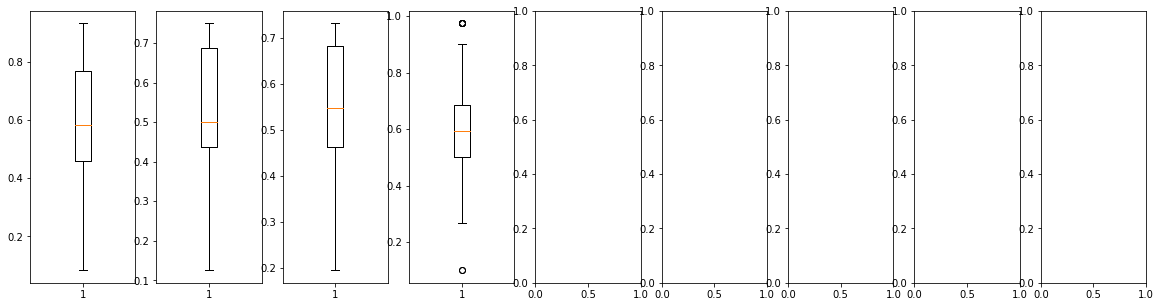

In [18]:
# boxplot for each feature 

fig, ax = plt.subplots(1,9, figsize=(20, 5))
ax[0].boxplot(model_frame14['cfb 14'])
ax[1].boxplot(model_frame14['nfl 14'])
ax[2].boxplot(model_frame14['nba 14'])
ax[3].boxplot(model_frame14['cbb 14'])
ax[4].boxplot(model_frame14['poverty'])
ax[5].boxplot(model_frame14['bachelors'])
ax[6].boxplot(model_frame14['hs'])
ax[7].boxplot(model_frame14['difference'])
ax[8].boxplot(model_frame14['GDP_growth_2017'])

# stats = ['College Football', 'NFL', 'NBA', 'College Baseball', 'poverty', 'bachelors', 'HS', 'difference', 'GDP Growth 2017']
# for i in range(9):
#     ax[i].set_title(stats[i])

In [ ]:
# Scatter Matrix 

to_scatter = ['cfb', 'nfl', 'nba', 'cbb', 'poverty', 'bachelors', 'hs', 'difference', 'GDP_growth_2017']

df_to_scatter = model_frame.loc[:,to_scatter]

from pandas.plotting import scatter_matrix
scatter_matrix(df_to_scatter, alpha=0.8, figsize=(10, 10), diagonal='kde');

In [ ]:
plt.hist(incumbent_wins['2017_GDP'], label='Incumbent won')
plt.hist(incumbent_loss['2017_GDP'], label= 'Incumbent lost')
plt.xlabel('GDP per capita')
plt.ylabel('Number Of Candidates')
plt.title('Incument wins and losses distributed by GDP per capit')
plt.legend()


In [ ]:
plt.hist(model_frame[model_frame['class'] == 0]['poverty'], label = 'Republican')
plt.hist(model_frame[model_frame['class'] == 1]['poverty'], alpha = .4, label = 'Democrat')
plt.hist(model_frame[model_frame['class'] == 2]['poverty'], alpha = 1, label = 'Other')
plt.xlabel('Percentage of State Below Poverty Line')
plt.ylabel('Number Of Candidates')
plt.title('Poverty Rates split by Party Vote')
plt.legend()

In [ ]:
plt.hist(model_frame[model_frame['class'] == 0]['bachelors'], label = 'Republican')
plt.hist(model_frame[model_frame['class'] == 1]['bachelors'], alpha = .4, label = 'Democrat')
plt.hist(model_frame[model_frame['class'] == 2]['bachelors'], alpha = 1, label = 'Other')
plt.xlabel('Percentage of residents with Bachelors Degree')
plt.ylabel('Number Of Candidates')
plt.title('Bachelors Degree Rates split by Party Vote')
plt.legend()

In [ ]:
plt.hist(model_frame[model_frame['class'] == 0]['hs'], label = 'Republican')
plt.hist(model_frame[model_frame['class'] == 1]['hs'], alpha = .4, label = 'Democrat')
plt.hist(model_frame[model_frame['class'] == 2]['hs'], alpha = 1, label = 'Other')
plt.xlabel('Percentage of residents with Highschool Degree')
plt.ylabel('Number Of Candidates')
plt.title('Highschool Degree Rates split by Party Vote')
plt.legend()

In [66]:
model_frame_to_try = model_frame.drop(['state_po','state_district'], axis=1)

NameError: name 'model_frame' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(model_frame_to_try.drop(['class'], axis=1), model_frame_to_try['class'], test_size=0.2, random_state=42)

In [ ]:
=================

In [ ]:
len(X_train.columns)

In [ ]:
X_train_full = X_train.copy()
X_test_full = X_test.copy()
y_train_full = y_train.copy()
y_test_full = y_test.copy()
print(len(X_train_full.columns))

In [ ]:
random_forest_full = RandomForestClassifier(max_features = int(np.sqrt(X_train_full.shape[1])), max_depth=5, n_estimators = 55)
random_forest_full.fit(X_train_full,y_train_full)

random_forest_train_predictions_full = random_forest_full.predict(X_train_full)
random_forest_test_predictions_full = random_forest_full.predict(X_test_full)

random_forest_train_score_full = accuracy_score(y_train, random_forest_train_predictions_full)
random_forest_test_score_full = accuracy_score(y_test, random_forest_test_predictions_full)

print("Random Forest Train Score: " + str(random_forest_train_score_full))
print("Random Forest Test Score: " + str(random_forest_test_score_full))

In [ ]:
X_train_full.head()

In [ ]:
==================

In [ ]:
X_train = X_train[['incumbency','pres_class','poverty','bachelors','hs','2017_GDP','cfb','nfl','nba','cbb']] # with most standard predictors
X_test = X_test[['incumbency','pres_class', 'poverty','bachelors','hs','2017_GDP','cfb','nfl','nba','cbb']]

In [ ]:
X_train.columns

In [ ]:
random_forest_model = RandomForestClassifier(max_features = int(np.sqrt(X_train.shape[1])), max_depth=5, n_estimators = 55)
random_forest_model.fit(X_train, y_train)

random_forest_train_predictions = random_forest_model.predict(X_train)
random_forest_test_predictions = random_forest_model.predict(X_test)

random_forest_train_score = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_score = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

In [ ]:
X_train = X_train[['pres_class','poverty','bachelors','hs','2017_GDP']] # without district incumbency information
X_test = X_test[['pres_class', 'poverty','bachelors','hs','2017_GDP']]

In [ ]:
random_forest_model = RandomForestClassifier(max_features = int(np.sqrt(X_train.shape[1])), max_depth=5, n_estimators = 55)
random_forest_model.fit(X_train, y_train)

random_forest_train_predictions = random_forest_model.predict(X_train)
random_forest_test_predictions = random_forest_model.predict(X_test)

random_forest_train_score = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_score = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

In [ ]:
X_train = X_train[['poverty','bachelors','hs','2017_GDP']] # without 2016 presidential election information
X_test = X_test[['poverty','bachelors','hs','2017_GDP']]

In [ ]:
random_forest_model = RandomForestClassifier(max_features = int(np.sqrt(X_train.shape[1])), max_depth=5, n_estimators = 55)
random_forest_model.fit(X_train, y_train)

random_forest_train_predictions = random_forest_model.predict(X_train)
random_forest_test_predictions = random_forest_model.predict(X_test)

random_forest_train_score = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_score = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

In [54]:
# model_frame14_y = model_frame14['class']
# m14x = model_frame14.drop(['class', 'state_po', 'state_district', 'district'], axis=1)
# model_frame14_x = StandardScaler().fit_transform(model_frame14.drop(['class', 'district','state_po', 'state_district'], axis=1))
# model_frame18_y = model_frame18['class']
# model_frame18_x = StandardScaler().fit_transform(model_frame18.drop(['class', 'district','state_po', 'state_district'], axis=1))
# #model_frame18_x = MinMaxScaler().fit_transform(model_frame18.drop(['class', 'state_po', 'state_district'], axis=1))
# X_train, X_test, y_train, y_test = train_test_split(model_frame14_x, model_frame14_y, test_size=0.2, random_state=42)

# #X_train = model_frame14_x.drop('incumbency', axis=1)
# #X_test = X_test.drop('incumbency', axis=1)
# #y_train = model_frame14_y

model_frame14_y = model_frame14['inc_win']
m14x = model_frame14.drop(['inc_win','incumbency','pres','pres_class','class', 'state_po', 'state_district', 'district'], axis=1)
model_frame14_x = StandardScaler().fit_transform(model_frame14.drop(['inc_win','incumbency','pres','class', 'state_po', 'state_district', 'district'], axis=1))
model_frame18_y = model_frame18['inc_win']
model_frame18_x = StandardScaler().fit_transform(model_frame18.drop(['inc_win','incumbency','pres','class', 'state_po', 'state_district', 'district'], axis=1))
m18x = model_frame18.drop(['inc_win','incumbency','pres','pres_class','class', 'state_po', 'state_district', 'district'], axis=1)

m14x_l = model_frame14[model_frame14['inc_win'] == 0]
m14x_l_x = m14x_l.drop(['inc_win','same','incumbency','pres','pres_class','class', 'state_po', 'state_district', 'district'], axis=1)
m14x_l_y = m14x_l['inc_win']

model_frame14.to_csv('m14.csv')
model_frame18.to_csv('m18.csv')

In [26]:
random_forest_model = RandomForestClassifier(max_features = 10, max_depth=10, n_estimators = 100)
random_forest_model.fit(m14x_l_x, m14x_l_y)

random_forest_train_predictions = random_forest_model.predict(m14x)
random_forest_test_predictions = random_forest_model.predict(m18x)

random_forest_train_score = accuracy_score(model_frame14_y, random_forest_train_predictions)
random_forest_test_score = accuracy_score(model_frame18_y, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

Random Forest Train Score: 0.05517241379310345
Random Forest Test Score: 0.1310344827586207


In [27]:
confusion_matrix(model_frame18_y, random_forest_train_predictions)

array([[ 57,   0],
       [378,   0]])

In [ ]:
random_forest_train_predictions = random_forest_model.predict(m18x)


random_forest_train_score = accuracy_score(model_frame18_y, random_forest_train_predictions)

print(np.unique(random_forest_train_predictions, return_counts=True))

print("Random Forest Train Score: " + str(random_forest_train_score))



In [34]:
ols = sm.OLS(model_frame14_y, m14x).fit()

y_pred = ols.predict(m18x)

accuracy_score(model_frame18_y, y_pred.round())



0.8689655172413793

In [ ]:
multi_logit_lasso = LogisticRegressionCV(cv=5,solver='liblinear',penalty='l1', max_iter = 10000)

multi_logit_lasso.fit(X_train, y_train)

y_pred = multi_logit_lasso.predict(model_frame18_x)
accuracy_score(model_frame18_y, y_pred.round())

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=160).fit(model_frame14_x, model_frame14_y)

y_pred = knn_model.predict(model_frame18_x)
accuracy_score(model_frame18_y, y_pred.round())

In [ ]:
model_nn = tf.keras.models.Sequential([

    tf.keras.layers.Dense(5, activation='relu',input_shape=(16,)),# kernel_regularizer= tf.keras.regularizers.l2(l=0.05)),
#     #tf.keras.layers.Dropout(.2),
#     tf.keras.layers.Dense(100, activation='relu'),# kernel_regularizer= tf.keras.regularizers.l2(l=0.01)),
#     #tf.keras.layers.Dropout(.2),
#     tf.keras.layers.Dense(100, activation='relu'),# kernel_regularizer= tf.keras.regularizers.l2(l=0.01)),
#     #tf.keras.layers.Dropout(.2),
#     tf.keras.layers.Dense(100, activation='relu'),#, kernel_regularizer= tf.keras.regularizers.l2(l=0.01)),
#     tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='relu')
])
loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam()

model_nn.compile(optimizer=optimizer,
              loss=loss_fn, metrics=['mae', 'acc'])

nn = model_nn.fit(X_train, y_train, validation_split=.1, epochs=100, verbose=2, batch_size=16)

In [ ]:
preds = model_nn.predict(model_frame18_x)

In [ ]:
# ABC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=8), learning_rate=.1, n_estimators = 5)

# ABC.fit(X_train, y_train)

# train_scores = list(ABC.staged_score(X_train.drop('incumbency', axis=1), y_train))
# test_scores = list(ABC.staged_score(model_frame18_x.drop('incumbency', axis=1), model_frame18_y))

ABC_loss = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=8), learning_rate=.1, n_estimators = 5)

ABC_loss.fit(incumbent_loss14.drop(['class','incumbency'], axis=1), incumbent_loss14['class'].values)

# ABC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=8), learning_rate=.1, n_estimators = 5)

# ABC.fit(model_frame14_x, model_frame14_y)


In [ ]:
estimators = np.linspace(1,5,5)

plt.plot(estimators, train_scores, label = 'Train Scores')
plt.plot(estimators, test_scores, label = 'Test Scores')
plt.legend()

In [ ]:
preds14 = ABC_loss.predict(model_frame14_x.drop('incumbency', axis=1))
preds18 = ABC_loss.predict(model_frame18_x.drop('incumbency', axis=1))

In [ ]:
new14 = pd.DataFrame()
new14['preds'] = preds14
new14['inc'] = model_frame14_x['incumbency'].values

new18 = pd.DataFrame()
new18['preds'] = preds18
new18['inc'] = model_frame18_x['incumbency'].values

In [ ]:
ols = sm.OLS(model_frame14_y.values,new14).fit()

y_pred = ols.predict(new18)
accuracy_score(model_frame18_y, y_pred.round())

ols.summary()

In [ ]:
# multi_logit = LogisticRegressionCV(cv=3,solver='liblinear', max_iter = 10000)

# multi_logit.fit(incumbent_loss14.drop(['class','incumbency'], axis=1), incumbent_loss14['class'].values)

# y_pred = multi_logit.predict(model_frame18_x.drop('incumbency', axis=1))
# accuracy_score(model_frame18_y, y_pred.round())

multi_logit = LogisticRegressionCV(cv=3,solver='liblinear',penalty = 'l2', max_iter = 10000)

multi_logit.fit(new14, model_frame14_y.values)

y_pred = multi_logit.predict(new18)
accuracy_score(model_frame18_y, y_pred.round())
multi_logit.predict_proba(new18)


In [ ]:
ABC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5), learning_rate=.5, n_estimators = 5)

ABC.fit(new14, model_frame14_y)

train_scores = list(ABC.staged_score(new14, model_frame14_y))
test_scores = list(ABC.staged_score(new18, model_frame18_y))

In [ ]:
estimators = np.linspace(1,5,5)

plt.plot(estimators, train_scores, label = 'Train Scores')
plt.plot(estimators, test_scores, label = 'Test Scores')
plt.legend()

In [ ]:
incumbent_loss14

In [65]:
random_forest_model_t = RandomForestClassifier(max_features = 4, max_depth=1, n_estimators = 20)
random_forest_model_t.fit(m14x, model_frame14_y)

ft = random_forest_model_t.predict(m14x)
ft = random_forest_model_t.predict(m18x)

ts = accuracy_score(model_frame14_y, ft)
tes = accuracy_score(model_frame18_y, ft)

print("Random Forest Train Score: " + str(ts))
print("Random Forest Test Score: " + str(tes))

Random Forest Train Score: 0.9448275862068966
Random Forest Test Score: 0.8689655172413793
